In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [2]:
## Import data
df = pd.read_csv("../input/languoid.csv")
df_geo = pd.read_csv("../input/languages-and-dialects-geo.csv")

## Drop columns I won't be using
df = df.drop(['description', 'markup_description', 'jsondata', 'hid'], axis = 1)
df_geo = df_geo.drop(['isocodes', 'latitude', 'longitude', 'level', 'name'], axis = 1)
df_geo.columns = ['id', 'macroarea']

In [3]:
## Compare number of rows of df and df_geo
print("df rows:    ", df.shape[0])
print("df_geo rows:", df_geo.shape[0])

df rows:     23243
df_geo rows: 18975


In [4]:
## Creating df_fam and updating df
df_fam = df[df['level'] == 'family'].reset_index()
df = df[df['level'] != 'family'].reset_index()

In [5]:
## Compare outputs of describe() between df and df_geo
print(df.id.describe())
print(df_geo.id.describe())

count        18975
unique       18975
top       muon1246
freq             1
Name: id, dtype: object
count        18975
unique       18975
top       muon1246
freq             1
Name: id, dtype: object


In [6]:
## Sort them and merge df_geo.macroarea into df
df.sort_values('id', inplace = True)
df_geo.sort_values('id', inplace = True)
df_result = pd.concat([df, df_geo.macroarea], axis = 1)

In [7]:
df_result

,index,bookkeeping,child_dialect_count,child_family_count,child_language_count,family_pk,father_pk,id,latitude,level,longitude,name,newick,pk,status,macroarea
0,0,False,0,0,0,21.0,20815.0,aala1237,NaN,dialect,NaN,Aalawa,'Aalawa [aala1237]',21802,safe,Papunesia
1,1,False,0,0,0,50.0,5525.0,aant1238,NaN,dialect,NaN,Aantantara,'Aantantara [aant1238]',8074,safe,Papunesia
2,3,False,0,0,0,202.0,2656.0,aari1239,5.95034,language,36.57210,Aari,'Aari [aari1239][aiw]-l-',4424,safe,Africa
3,4,True,0,0,0,120.0,120.0,aari1240,NaN,language,NaN,Aariya,'Aariya [aari1240][aay]-l-',1134,safe,Eurasia
4,5,False,0,0,0,376.0,4943.0,aasa1238,-4.00679,language,36.86480,Aasax,'Aasax [aasa1238][aas]-l-',7144,extinct,Africa
5,6,False,0,0,0,50.0,5523.0,aata1238,NaN,dialect,NaN,Aatasaara,'Aatasaara [aata1238]',8070,safe,Papunesia
6,7,False,0,0,0,151.0,9058.0,abaa1238,NaN,dialect,NaN,Aba,'Aba [abaa1238]',11889,safe,Eurasia
7,8,False,0,0,0,376.0,3203.0,abab1239,NaN,dialect,NaN,Ababda,'Ababda [abab1239]',4942,safe,Africa
8,10,False,0,0,0,351.0,3001.0,abad1240,NaN,dialect,NaN,Abadzex,'Abadzex [abad1240]',4716,safe,Papunesia
9,11,False,0,0,0,21.0,19351.0,abad1241,-9.03389,language,146.99200,Abadi,'Abadi [abad1241][kbt]-l-',20702,safe,Eurasia


Until here, the process was to create df_result, containing only important columns from languoid.csv, plus the macroarea of each languoid.

----------------

From here, it's just 'training' plot with original df. Will update those later.

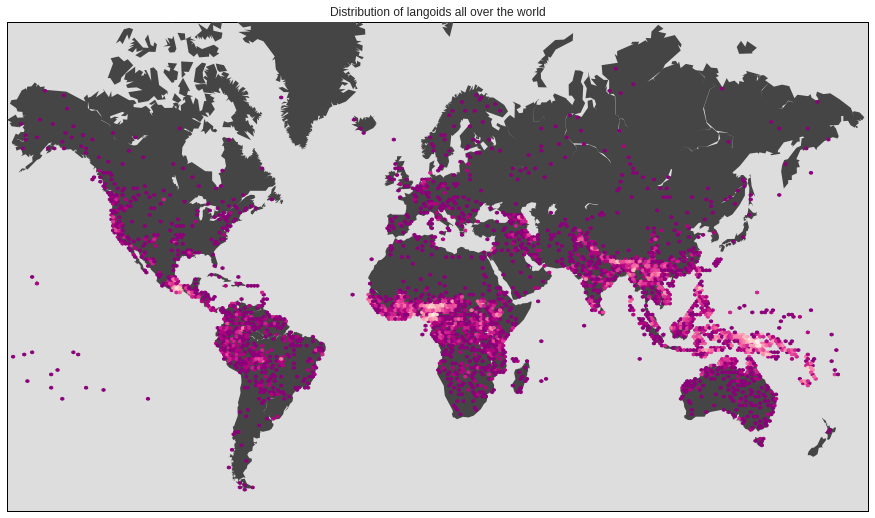

In [8]:
df = pd.read_csv("../input/languoid.csv")
df = df[['latitude', 'longitude', 'name']].dropna(axis = 0, how= 'any')

west, east = -168, 192
south,north = -60, 78

fig = plt.figure(figsize=(16,9))
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, resolution='c')

x, y = m(df['longitude'].values, df['latitude'].values)

m.drawmapboundary(fill_color='#DDDDDD', zorder= 0);
m.fillcontinents(color='#454545', zorder = 1);
m.hexbin(x, y,
         bins = 'log',
         cmap = 'RdPu_r',
         mincnt = 1,
         gridsize = (270,95),
         zorder=2,
         vmin = 0
        );
plt.title("Distribution of langoids all over the world");

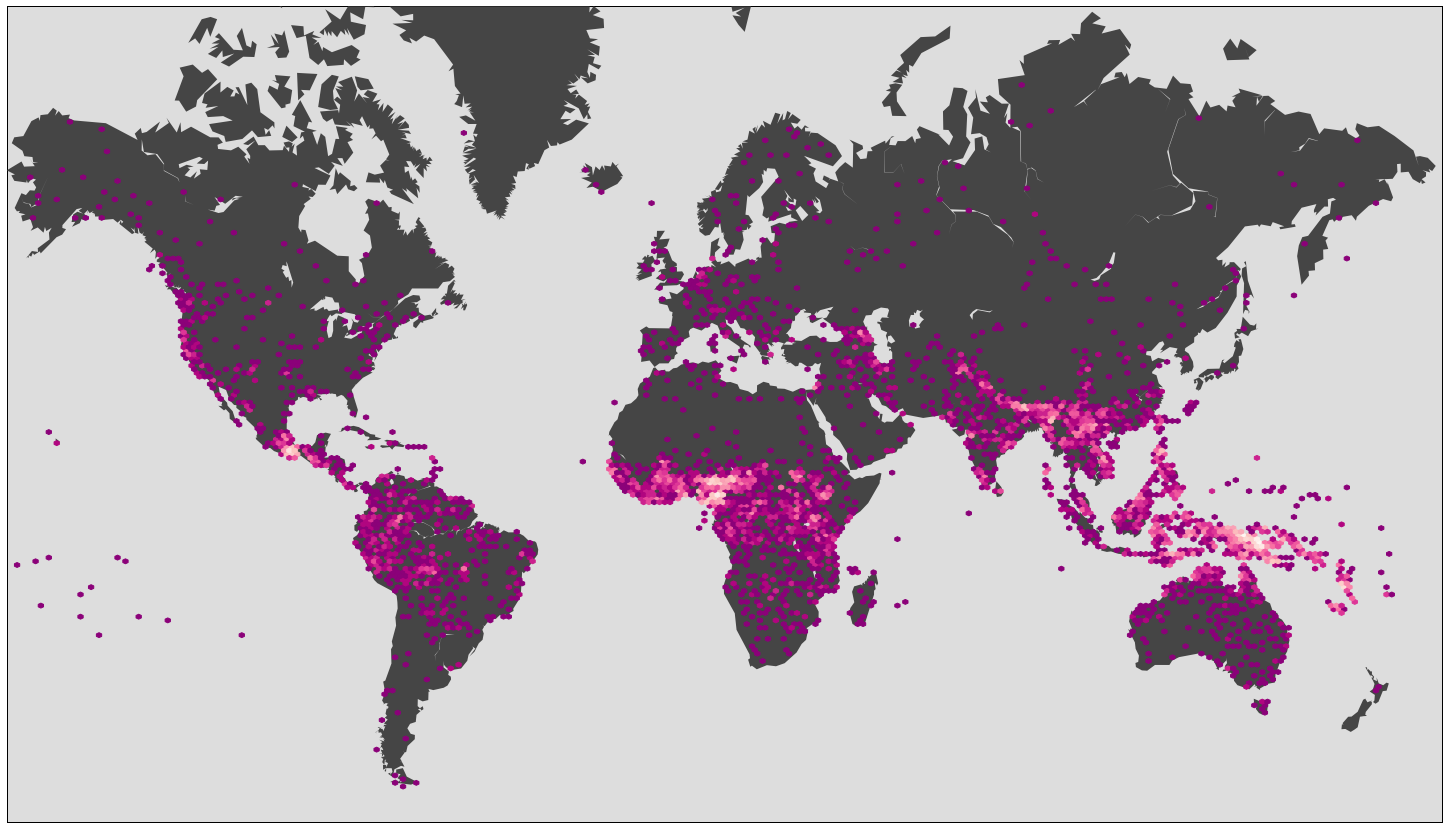

In [9]:
df = pd.read_csv("../input/languoid.csv")
df = df[['latitude', 'longitude', 'name']].dropna(axis = 0, how= 'any')

west, east = -168, 192
south,north = -60, 78

fig = plt.figure(figsize=(30,15))
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, resolution='c')

x, y = m(df['longitude'].values, df['latitude'].values)

m.drawmapboundary(fill_color='#DDDDDD', zorder= 0);
m.fillcontinents(color='#454545', zorder = 1);
m.hexbin(x, y,
         bins = 'log',
         cmap = 'RdPu_r',
         mincnt = 1,
         gridsize = (270,95),
         zorder=2,
         vmin = 0
        );

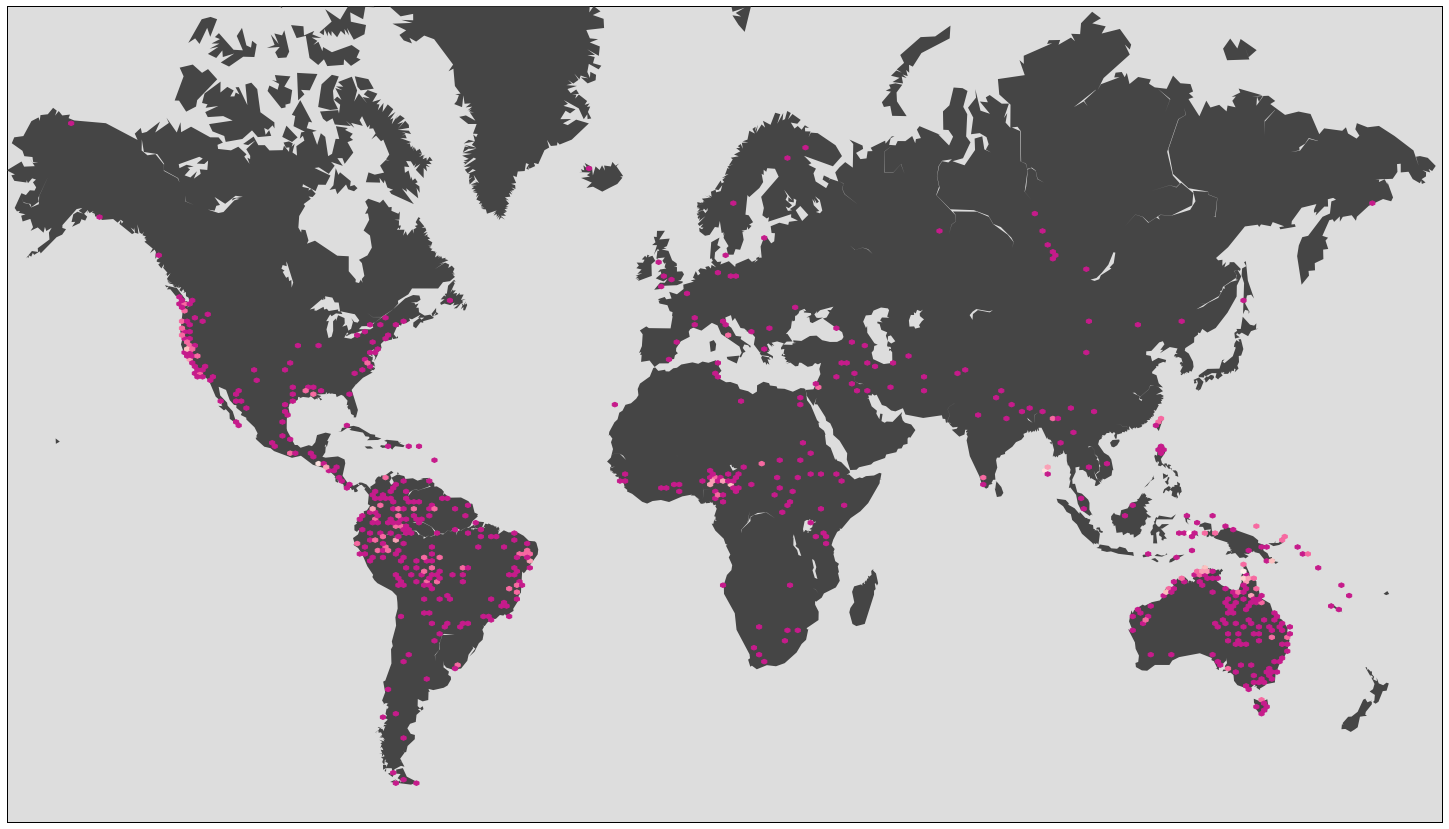

In [10]:
df = pd.read_csv("../input/languoid.csv")
df = df[['latitude', 'longitude', 'name', 'status']].dropna(axis = 0, how= 'any')
df = df[df['status'] == 'extinct']
west, east = -168, 192
south,north = -60, 78

fig = plt.figure(figsize=(30,15))
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, resolution='c')

x, y = m(df['longitude'].values, df['latitude'].values)

m.drawmapboundary(fill_color='#DDDDDD', zorder= 0);
m.fillcontinents(color='#454545', zorder = 1);
m.hexbin(x, y,
         bins = 'log',
         cmap = 'RdPu_r',
         mincnt = 1,
         gridsize = (270,95),
         zorder=2,
         vmin = 0
        );

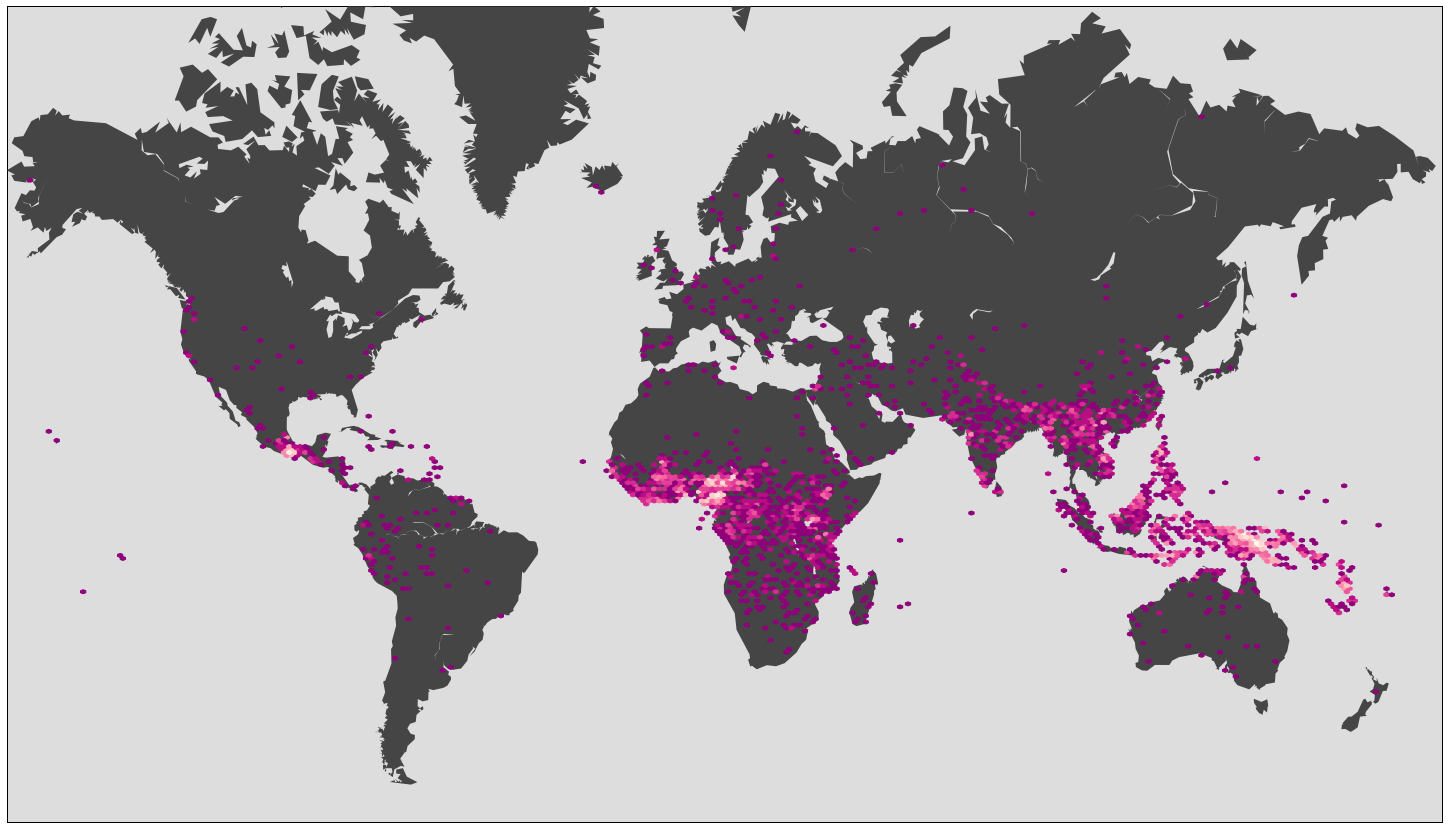

In [11]:
df = pd.read_csv("../input/languoid.csv")
df = df[['latitude', 'longitude', 'name', 'status']].dropna(axis = 0, how= 'any')
df = df[df['status'] == 'safe']
west, east = -168, 192
south,north = -60, 78

fig = plt.figure(figsize=(30,15))
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, resolution='c')

x, y = m(df['longitude'].values, df['latitude'].values)

m.drawmapboundary(fill_color='#DDDDDD', zorder= 0);
m.fillcontinents(color='#454545', zorder = 1);
m.hexbin(x, y,
         bins = 'log',
         cmap = 'RdPu_r',
         mincnt = 1,
         gridsize = (270,95),
         zorder=2,
         vmin = 0
        );